<a href="https://colab.research.google.com/github/nicknovoa03/Stock-trader/blob/Nick-Dev/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from statistics import mean
import datetime
import matplotlib.pyplot as plt

# All lists and Dictionaries ordered from most recent to oldest
dateList = []
closeList = []
volList = []
openList = []
highList = []
lowList = []

closeDic = {}   # key=date(string), value=close(float)
volDic = {}     # key=date(string), value=volume(float)
openDic = {}    # key=date(string), value=open(float)
highDic = {}    # key=date(string), value=high(float)
lowDic = {}     # key=date(string), value=low(float)

#   0  ,    1  ,    2   ,    3 ,    4  ,  5
# "date","close","volume","open","high","low"
#
# "2019/03/15","186.1200","39017490.0000","184.8500","187.3300","183.7400"
# "2019/03/14","183.7300","23527660.0000","183.9000","184.1000","182.5600"
# ...etc
def readFile(path):
    with open(path, "r") as fin:
        trash = fin.readline()
        trash = fin.readline()
        for line in fin.readlines():
            line = line.replace("\"", "")
            lineList = line.strip().split(",")
            
            dateList.append(lineList[0])
            closeList.append(float(lineList[1]))
            volList.append(float(lineList[2]))
            openList.append(float(lineList[3]))
            highList.append(float(lineList[4]))
            lowList.append(float(lineList[5]))
            
            closeDic[lineList[0]] = float(lineList[1])
            volDic[lineList[0]] = float(lineList[2])
            openDic[lineList[0]] = float(lineList[3])
            highDic[lineList[0]] = float(lineList[4])
            lowDic[lineList[0]] = float(lineList[5])

            
def printDic(dic, dicName):
    print("\n%s:" %dicName)
    i = 1
    for key in dic.keys():
        if dic[key]:
            float(dic[key])
            dic[key] = "{0:.5f}".format(dic[key])
            print("%s : %s" %(key, dic[key]),end=",\t\t")
            if i % 2 == 0: print()
            i += 1
    print()
    
def printList(l, listName):
    print("\n%s:" %listName)
    i = 1
    for item in l:
        item = "{0:.5f}".format(item)
        print(item, end=",\t")
        if i % 4 == 0: print()
        i += 1
    print()
    
def printDateList():
    print("\n\nDate List:")
    i = 1
    for item in dateList:
        print(item, end=",\t")
        if i % 4 == 0: print()
        i += 1
    print()

        
filepath = "data/APPL.csv"
readFile(filepath)

In [0]:
sma50Avg = 0
sma50List = []
sma50Dic = {}

sma10Avg = 0
sma10List = []
sma10Dic = {}

def calcSMA(start, period, smaList, smaDic):
    if start+period-1 == len(closeList):
        return
    sma = mean(closeList[start:period+start])
    smaList.insert(start,sma)
    smaDic[dateList[start+period-1]] = sma
    calcSMA(start+1, period, smaList, smaDic)
    return smaList, smaDic
    
    
def calcAvgSMA(start, period):
    return mean(smaList[start:period])


#print("closeList Length=%d" %len(closeList))
calcSMA(0,50,sma50List,sma50Dic)
sma50Avg = calcAvgSMA(0,50)
print("sma50Avg=%f" %sma50Avg)
print("Sma50List Length=%d" %len(sma50List))
printList(sma50List, "SMA 50 List")
printDic(sma50Dic, "SMA 50 Dictionary")

calcSMA(0,10,sma10List,sma10Dic)
sma10Avg = calcAvgSMA(0,10)
print("sma10Avg=%f" %sma10Avg)
print("Sma10List Length=%d" %len(sma10List))
printList(sma10List, "SMA 10 List")
printDic(sma10Dic, "SMA 10 Dictionary")

#print(smaList)
#print(smaDic)

sma50Avg=166.134100
Sma50List Length=1210

SMA 50 List:
166.00100,	165.43700,	164.91720,	164.40760,	
163.91240,	163.47780,	162.95620,	162.52080,	
162.16700,	161.87420,	161.67860,	161.45800,	
161.30460,	161.22620,	161.12160,	161.00960,	
160.94220,	160.89080,	160.94460,	161.05980,	
161.34780,	161.50340,	161.69080,	161.89180,	
161.98800,	162.07220,	162.09920,	162.15000,	
162.20600,	162.49820,	163.03840,	163.53780,	
163.96880,	164.71980,	165.47720,	166.41140,	
167.52720,	168.64780,	169.65720,	170.55260,	
171.58500,	172.93060,	174.24640,	175.51240,	
176.71140,	177.96140,	179.29120,	180.57800,	
182.07400,	183.52180,	185.06420,	186.22620,	
187.49520,	188.81360,	190.03780,	191.33660,	
192.68900,	194.00160,	195.40240,	196.66000,	
197.82440,	199.10540,	200.43720,	201.60380,	
202.76700,	203.90920,	205.01620,	206.05480,	
207.00420,	207.88620,	208.54300,	209.37200,	
210.14840,	210.89440,	211.76720,	212.75160,	
213.83400,	214.71980,	215.65720,	216.30660,	
216.86200,	217.49580,	218.29720,	219.01980,	

2017/06/15 : 151.01320,		2017/06/14 : 150.73100,		
2017/06/13 : 150.46320,		2017/06/12 : 150.17600,		
2017/06/09 : 150.01140,		2017/06/08 : 149.96120,		
2017/06/07 : 149.91140,		2017/06/06 : 149.78140,		
2017/06/05 : 149.62800,		2017/06/02 : 149.54000,		
2017/06/01 : 149.45400,		2017/05/31 : 149.40280,		
2017/05/30 : 149.25500,		2017/05/26 : 149.12560,		
2017/05/25 : 149.02680,		2017/05/24 : 148.96580,		
2017/05/23 : 148.93040,		2017/05/22 : 148.86740,		
2017/05/19 : 148.92760,		2017/05/18 : 149.00380,		
2017/05/17 : 149.01880,		2017/05/16 : 149.11700,		
2017/05/15 : 149.16180,		2017/05/12 : 149.22900,		
2017/05/11 : 149.26620,		2017/05/10 : 149.32600,		
2017/05/09 : 149.39900,		2017/05/08 : 149.43880,		
2017/05/05 : 149.41640,		2017/05/04 : 149.35580,		
2017/05/03 : 149.31620,		2017/05/02 : 149.31100,		
2017/05/01 : 149.32780,		2017/04/28 : 149.29020,		
2017/04/27 : 149.26480,		2017/04/26 : 149.25480,		
2017/04/25 : 149.29080,		2017/04/24 : 149.28180,		
2017/04/21 : 149.25720,		2017/0

sma10Avg=163.767120
Sma10List Length=1250

SMA 10 List:
178.26800,	177.15300,	176.09500,	175.41100,	
174.75300,	174.28600,	174.29200,	174.14800,	
173.89900,	173.43900,	172.89600,	172.47900,	
172.18200,	171.78400,	171.29400,	170.91200,	
170.70900,	171.02700,	171.24200,	171.27400,	
170.88400,	170.44800,	169.95500,	168.33400,	
167.02100,	165.75600,	163.93200,	161.90000,	
159.81200,	158.36900,	157.30300,	156.15300,	
154.93500,	154.46700,	154.06600,	153.67000,	
153.73100,	153.41400,	152.87700,	152.02100,	
150.65400,	150.95200,	151.41900,	152.04200,	
152.42800,	152.76500,	152.11700,	152.11500,	
153.00500,	154.26800,	156.65600,	157.25800,	
158.03200,	159.50400,	160.79900,	161.94500,	
164.22200,	165.99800,	167.78700,	169.36700,	
171.24200,	172.70600,	174.11300,	175.11200,	
175.62600,	176.22500,	176.49400,	177.32300,	
177.54900,	178.46600,	179.33700,	180.62000,	
181.34500,	182.47400,	184.46700,	187.45200,	
191.07200,	194.38900,	197.06800,	198.64100,	
200.03600,	203.11700,	206.32300,	208.43000,	

2018/12/18 : 156.65600,		2018/12/17 : 157.25800,		
2018/12/14 : 158.03200,		2018/12/13 : 159.50400,		
2018/12/12 : 160.79900,		2018/12/11 : 161.94500,		
2018/12/10 : 164.22200,		2018/12/07 : 165.99800,		
2018/12/06 : 167.78700,		2018/12/04 : 169.36700,		
2018/12/03 : 171.24200,		2018/11/30 : 172.70600,		
2018/11/29 : 174.11300,		2018/11/28 : 175.11200,		
2018/11/27 : 175.62600,		2018/11/26 : 176.22500,		
2018/11/23 : 176.49400,		2018/11/21 : 177.32300,		
2018/11/20 : 177.54900,		2018/11/19 : 178.46600,		
2018/11/16 : 179.33700,		2018/11/15 : 180.62000,		
2018/11/14 : 181.34500,		2018/11/13 : 182.47400,		
2018/11/12 : 184.46700,		2018/11/09 : 187.45200,		
2018/11/08 : 191.07200,		2018/11/07 : 194.38900,		
2018/11/06 : 197.06800,		2018/11/05 : 198.64100,		
2018/11/02 : 200.03600,		2018/11/01 : 203.11700,		
2018/10/31 : 206.32300,		2018/10/30 : 208.43000,		
2018/10/29 : 210.23700,		2018/10/26 : 211.42000,		
2018/10/25 : 212.55100,		2018/10/24 : 213.06500,		
2018/10/23 : 214.96100,		2018/1

In [0]:
dydxAvg = 0
dydx2Avg = 0
dydxList = []
dydx2List = []

def CalcDydx(l):
    global dydxList
    global dydxAvg
    dx = 1
    dydxList = list(numpy.diff(smaList) / dx)
    dydxAvg = mean(dydxList)

def calcDydx2():
    global dydx2List
    global dydx2Avg
    dx = 1
    dydx2List = list(numpy.diff(dydxList) / dx)
    dydx2Avg = mean(dydx2List)


calcDydx()
print("Dydx Length=%d" %len(dydxList))
print("Dydx2 Length=%d" %len(dydx2List))
printList(dydxList, "dy/dx List")
printList(dydx2List, "d2y/dx2 List")

Dydx Length=1209
Dydx2 Length=1208


dy/dx List:
-0.56400,	-0.51980,	-0.50960,	-0.49520,	
-0.43460,	-0.52160,	-0.43540,	-0.35380,	
-0.29280,	-0.19560,	-0.22060,	-0.15340,	
-0.07840,	-0.10460,	-0.11200,	-0.06740,	
-0.05140,	0.05380,	0.11520,	0.28800,	
0.15560,	0.18740,	0.20100,	0.09620,	
0.08420,	0.02700,	0.05080,	0.05600,	
0.29220,	0.54020,	0.49940,	0.43100,	
0.75100,	0.75740,	0.93420,	1.11580,	
1.12060,	1.00940,	0.89540,	1.03240,	
1.34560,	1.31580,	1.26600,	1.19900,	
1.25000,	1.32980,	1.28680,	1.49600,	
1.44780,	1.54240,	1.16200,	1.26900,	
1.31840,	1.22420,	1.29880,	1.35240,	
1.31260,	1.40080,	1.25760,	1.16440,	
1.28100,	1.33180,	1.16660,	1.16320,	
1.14220,	1.10700,	1.03860,	0.94940,	
0.88200,	0.65680,	0.82900,	0.77640,	
0.74600,	0.87280,	0.98440,	1.08240,	
0.88580,	0.93740,	0.64940,	0.55540,	
0.63380,	0.80140,	0.72260,	0.66920,	
0.41120,	0.28980,	0.19500,	0.28340,	
0.29140,	0.16020,	-0.14340,	-0.07640,	
0.04320,	0.10680,	-0.05960,	-0.19120,	
-0.10680,	-0.27720,	-0.26240,	-0.20860,	
-

0.00420,	-0.02440,	0.05960,	-0.04220,	
-0.01580,	0.01420,	0.07840,	0.06020,	
-0.01880,	-0.02860,	0.01110,	0.06190,	
-0.01260,	-0.03240,	-0.04040,	0.02380,	
0.01980,	-0.01360,	0.01040,	-0.03460,	
-0.02360,	0.02000,	-0.16300,	0.00900,	
-0.02440,	-0.00360,	-0.00760,	-0.04540,	
-0.01280,	0.01980,	-0.00360,	-0.00120,	
-0.00360,	-0.01280,	0.06260,	0.01480,	
-0.01840,	-0.01240,	0.01000,	-0.05840,	
0.01760,	-0.01140,	-0.00200,	0.04760,	
-0.00360,	0.01120,	-0.00560,	-0.01100,	
0.00500,	0.00140,	-0.01500,	0.00300,	
-0.01960,	0.04340,	0.00120,	-0.03240,	
0.01560,	-0.04820,	-0.01360,	-0.00200,	
-0.00930,	0.01250,	0.00160,	0.05520,	
0.04220,	-0.00380,	0.01200,	-0.00100,	
0.03620,	0.02280,	-0.02240,	-0.00660,	
0.14880,	-0.06320,	-0.03440,	0.05460,	
-0.01160,	0.10000,	0.00140,	-0.01140,	
-0.02700,	0.01560,	0.03500,	0.01720,	
0.03680,	-0.00640,	0.02800,	0.02460,	
0.07480,	0.01400,	-0.00920,	0.00660,	
0.00780,	-0.01120,	0.00100,	-0.00840,	
0.00180,	0.01180,	-0.03620,	-0.00280,	
-0.03360,	0.01000,	-0.01

In [0]:
#  (12 * (p0 / p1 – 1))
# + (4 * (p0 / p3 – 1))
# + (2 * (p0 / p6 – 1))
# +      (p0 / p12 – 1)
# Where p0 = the asset price at today’s close, 
# p1 = the asset price at the close of the previous month, etc.

today = datetime.datetime.today().strftime('%Y/%m/%d')
momentum = [0 for x in range(0,4)]
confidence = 0

def dayDif(d1, d2):
    d1 = datetime.strptime(d1, '%Y/%m/%d')
    d2 = datetime.strptime(d2, '%Y/%m/%d')
    return abs((d2 - d1).days)
    
def calcMomentum():
    global momentum
    p0=0.0; p1=0.0; p3=0.0; p6=0.0; p12=0.0
    months = ['12','11','10','09','08','07','06','05','04','03','02','01','12','11','10','09','08','07','06','05','04','03','02','01']
    p0_mn = dateList[0][5:7] # current month
    p1_mn = months[months.index(p0_mn)+1]
    p3_mn = months[months.index(p0_mn)+3]
    p6_mn = months[months.index(p0_mn)+6]
    p12_mn = months[months.index(p0_mn)+12]
    
    #print("p0_mn=%s, p1_mn=%s, p3_mn=%s, p6_mn=%s, p12_mn=%s" %(p0_mn,p1_mn,p3_mn,p6_mn,p12_mn))
    for d in dateList:
        dates = d.split("/")
        if dates[1] == p0_mn and p0 == 0:
            p0 = float(closeDic[d])
            #print("%s : p0=%f\n" %(d,p0))
        elif dates[1] == p1_mn and p1 == 0:
            p1 = float(closeDic[d])
            #print("%s : p1=%f\n" %(d,p1))
        elif dates[1] == p3_mn and p3 == 0:
            p3 = float(closeDic[d])
            #print("%s : p3=%f\n" %(d,p3))
        elif dates[1] == p6_mn and p6 == 0:
            p6 = float(closeDic[d])
            #print("%s : p6=%f\n" %(d,p6))
        elif dates[1] == p12_mn and p12 == 0 and p6 != 0: 
            p12 = float(closeDic[d])
            #print("%s : p12=%f\n" %(d,p12))
            break
    
    #print("p0=%f, p1=%f, p3=%f, p6=%f, p12=%f" %(p0,p1,p3,p6,p12))
    momentum[0] = 12 * (p0 / p1 - 1)
    momentum[1] = 4 * (p0 / p3 - 1)
    momentum[2] = 2 * (p0 / p6 - 1)
    momentum[3] = 1 * (p0 / p12 - 1)
    print("momentum[0]=%f \nmomentum[1]=%f \nmomentum[2]=%f\nmomentum[3]=%f" %(momentum[0],momentum[1],momentum[2],momentum[3]))
    confidence = momentum[0] + momentum[1] + momentum[2] + momentum[3]
    return confidence


print("Today is %s" %today)
confidence = calcMomentum()
print("Confidence: %f" %confidence)
#printDateList()
printList(momentum, "Momentum List")

Today is 2019/03/18
momentum[0]=0.898874 
momentum[1]=0.719665 
momentum[2]=-0.351023
momentum[3]=0.109310
Confidence: 1.376826


Momentum List:
0.89887,	0.71967,	-0.35102,	0.10931,	



In [0]:
ema10List = [None for x in closeList]
ema10Dic = {}


# starts from bottom of list
def calcEMA(start, period, emaList, emaDic,smaList):
    if period == 10: smaList = sma10List
    elif period == 50: smaList = sma50List
    
    print("params: %d, %d - " %(start,period))
    if start == 0:
        return
    if start > len(closeList)-period-1:
        print(start)
        print(len(smaList))
        #print(smaList[start])
        emaList.insert(start,smaList[start])
        emaDic[dateList[start]] = smaList[start]
    else:
        smoothing = 2 / (period + 1)
        w = smoothing / (period + 1)
        #print(len(emaList))
        ema = (closeList[start] * w) + (emaList[start+1] * (1 - w))
        #print("EMA=%f - " %ema, end="")
        if ema != 0:
            emaList.insert(start,ema)
            emaDic[dateList[start]] = ema
        #print(emaList[start])
    calcEMA(start-1,period,emaList,emaDic,smaList)
    return emaList,emaDic

'''
def calcSMA(start, period, smaList, smaDic):
    if start+period-1 == len(closeList):
        return
    sma = mean(closeList[start:period+start])
    smaList.insert(start,sma)
    smaDic[dateList[start+period-1]] = sma
    calcSMA(start+1, period, smaList, smaDic)
    return smaList, smaDic
'''

ema10List,ema10Dic = calcEMA(len(closeList)-1,10,ema10List,ema10Dic,sma10List)
#ema10List = calcEMA2(len(closeList)-1,10,ema10List,ema10Dic)
#ema10List = ema10List.reverse()
#printDic(ema10Dic, "EMA 10 Dictionary")

params: 1258, 10 - 
1258
1250


IndexError: list index out of range

[]


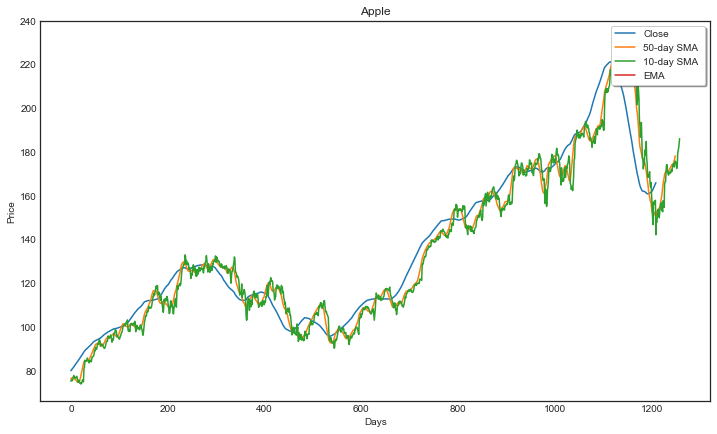

In [0]:
legendList = ["Close", "50-day SMA", "10-day SMA ","EMA"]

def graph(*args): 
    i = 0 
    for arg in args:
        #arg = scale(arg)
        x = [z for z in range(0,len(arg))]
        y = []
        for v in arg:
            y.append(float(v))
        y.reverse()
        plt.plot(x,y,label=legendList[i])
        i += 1
def plotGraph(): 
    plt.figure(figsize=(12,7)) 
    plt.style.use('seaborn-white') 
    tmp = list(ema10Dic.values())
    print(tmp)
    graph(sma50List,sma10List,closeList,tmp)
    plt.title("Apple")
    plt.ylabel("Price")
    plt.xlabel("Days")
    plt.legend(loc = 1, frameon = True, fancybox = True, shadow = True)    
    plt.show()

plotGraph()